#Task Definition

##The task is to build a Support Vector Machine for classification. You will make
use of a library routine to solve the optimization problem which emerges in the
dual formulation of the support vector machine. You need to write code for
structuring the data so that the library routine can find the maximal-margin
solution, and code for transforming this solution into a classifier which can
process new data.

In [205]:
# import all necessary libraries
!pip install numpy
!pip install matplotlib
!pip install scipy
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.optimize import minimize


**Generate kernels required (linear kernel function, polynomial kernel function and radical basis function)

In [206]:
# Linear kernel function
def linear_kernel(x, y):
    return np.dot(x, y)

# Polynomial kernel function (degree=2)
def polynomial_kernel(x, y, p=2):
    return (np.dot(x, y) + 1) ** p

# Radial Basis Function (RBF) kernel
def rbf_kernel(x, y, sigma=1):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

**Define Objective function and equality constraints function

In [207]:
# Objective function to minimize (Equation 4)
def objective(alpha):
    return 0.5 * np.dot(alpha, np.dot(alpha * targets, P)) - np.sum(alpha)

In [208]:
# Equality constraint function (sum of alpha_i * t_i = 0)
def zerofun(alpha):
    return np.dot(alpha, targets)

**Generate Data and visualize

In [209]:
# Generate training data
np.random.seed(100)
classA = np.concatenate((np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
                         np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))

classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs = np.concatenate((classA, classB))
targets = np.concatenate((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))


# Shuffle data
N = inputs.shape[0]
permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

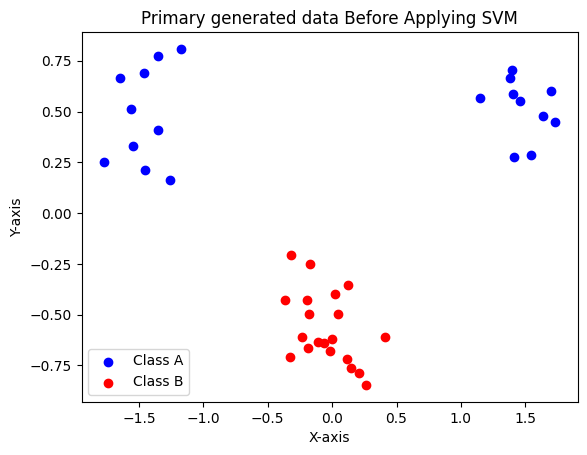

In [210]:
# Visualizing the data before applying SVM
plt.figure()
plt.scatter(classA[:, 0], classA[:, 1], color='blue', label='Class A')
plt.scatter(classB[:, 0], classB[:, 1], color='red', label='Class B')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title("Primary generated data Before Applying SVM")
plt.savefig("Primarydata.pdf")
plt.show()

**Kernel selection and computing required matrix(p) for objective function and set bounds together with constraints

In [211]:
# Choose kernel (linear, polynomial, or RBF)
# kernel = linear_kernel
kernel = polynomial_kernel
# kernel = rbf_kernel

# Compute the P matrix for the objective function
P = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        P[i, j] = targets[i] * targets[j] * kernel(inputs[i], inputs[j])

# Set up the bounds and constraints
C = 0.9  # Slack variable parameter
start = np.zeros(N)
B = [(0, C) for _ in range(N)]
XC = {'type': 'eq', 'fun': zerofun}

**Minimizing objective function and extract support vectors

In [212]:
# Minimize the objective function
ret = minimize(objective, start, bounds=B, constraints=XC)
alpha = ret['x']
# Extract non-zero alpha values (support vectors)
support_vectors = [(inputs[i], targets[i], alpha[i]) for i in range(N) if alpha[i] > 1e-5]

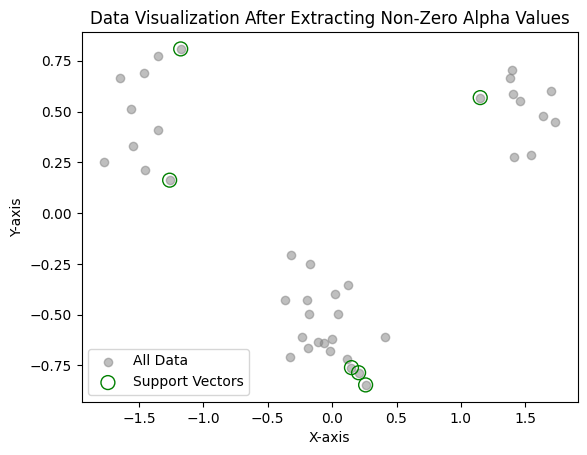

In [213]:
# Visualizing the data after extracting non-zero alpha values
plt.figure()
plt.scatter(inputs[:, 0], inputs[:, 1], color='gray', alpha=0.5, label='All Data')
plt.scatter([p[0][0] for p in support_vectors], [p[0][1] for p in support_vectors], s=100, facecolors='none', edgecolors='green', label='Support Vectors')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title("Data Visualization After Extracting Non-Zero Alpha Values")
plt.savefig("Secondarydata.pdf")
plt.show()

**Compute threshold value (b) and gather support vectors, primary data together with the indicatior

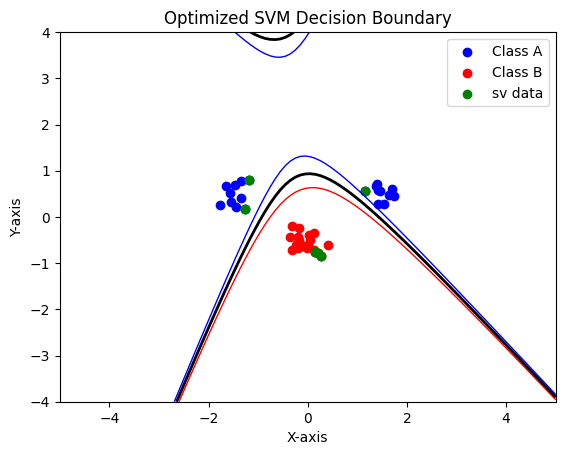

In [214]:
# Calculate the bias term b (using equation 7)
b = 0
for x, t, a in support_vectors:
    b = t - sum(a_i * t_i * kernel(x, x_i) for x_i, t_i, a_i in support_vectors)
    break

# Indicator function for classifying new points
def indicator(x, y):
    return sum(a * t * kernel(np.array([x, y]), x_i) for x_i, t, a in support_vectors) - b


# Plotting the training data
plt.figure()
plt.scatter([p[0] for p in classA], [p[1] for p in classA], color='blue', label='Class A')
plt.scatter([p[0] for p in classB], [p[1] for p in classB], color='red', label='Class B')
plt.scatter([p[0][0] for p in support_vectors], [p[0][1] for p in support_vectors], color='green', label='sv data')

# Highlight support vectors
plt.plot([p[0][0] for p in support_vectors], [p[0][1] for p in support_vectors], 'go')

# Decision boundary and margins
xgrid = np.linspace(-5, 5, 100)
ygrid = np.linspace(-4, 4, 100)
grid = np.array([[indicator(x, y) for x in xgrid] for y in ygrid])

plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1, 2, 1))

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title("Optimized SVM Decision Boundary")
plt.savefig('finaldataplot.pdf')
plt.show()